In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic "climate" data
 
# For reproducibility
rng = np.random.default_rng(seed=42) 

# We want 1000 samples
n_samples = 1000
temperature = rng.normal(loc=15, scale=10, size=n_samples)  # Mean 15°C, std 10°C
humidity = rng.normal(loc=75, scale=15, size=n_samples)     # Mean 75%, std 15%
# Introduce correlation: precipitation is a function of humidity plus some noise
precipitation = 0.5 * humidity + rng.normal(loc=0, scale=10, size=n_samples)  # Correlated with humidity
wind_speed = rng.normal(loc=10, scale=5, size=n_samples)    # Mean 10m/s, std 5m/s
# Introduce correlation: solar radiation is a function of temperature plus some noise
solar_radiation = 0.8 * temperature + rng.normal(loc=0, scale=5, size=n_samples)  # Correlated with temperature

# Combine into a DataFrame
climate_data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'Humidity (%)': humidity,
    'Precipitation (mm)': precipitation,
    'Wind Speed (m/s)': wind_speed,
    'Solar Radiation (W/m2)': solar_radiation
})
climate_data.head()

,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Solar Radiation (W/m2)
0,18.047171,74.110760,32.535870,16.245113,15.703759
1,4.600159,64.060696,25.371571,13.438461,8.156219
2,22.504512,68.782904,38.731550,19.830637,19.370216
3,24.405647,84.508656,44.772872,2.260836,30.718676
4,-4.510352,75.044899,23.474534,8.673199,3.540656


In [3]:
# Now, let's calculate a *correlation matrix*
correlation_matrix = climate_data.corr()

# Finally, let us display the correlation matrix with a color gradient
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Solar Radiation (W/m2)
Temperature (°C),1.000000,-0.007894,0.019758,0.007777,0.844700
Humidity (%),-0.007894,1.000000,0.585828,-0.020930,-0.007003
Precipitation (mm),0.019758,0.585828,1.000000,0.019476,0.032101
Wind Speed (m/s),0.007777,-0.020930,0.019476,1.000000,0.009122
Solar Radiation (W/m2),0.844700,-0.007003,0.032101,0.009122,1.000000


Which feature(s) might we remove given these correlations?

Text(0.5, 1.0, 'Scatter Plot of Temperature vs Solar Radiation')

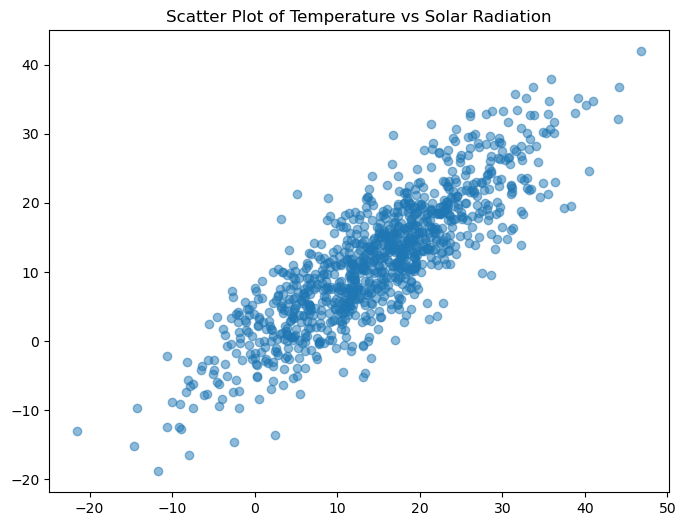

In [7]:
# Here, plot a pair of highly correlated variables (NOT the same variable).
plt.figure(figsize=(8,6)) 
plt.scatter(climate_data['Temperature (°C)'], climate_data['Solar Radiation (W/m2)'], alpha=0.5)
plt.title('Scatter Plot of Temperature vs Solar Radiation')